# <tt>Ukraine vs Russia: Twitter sentiment analysis

</br>

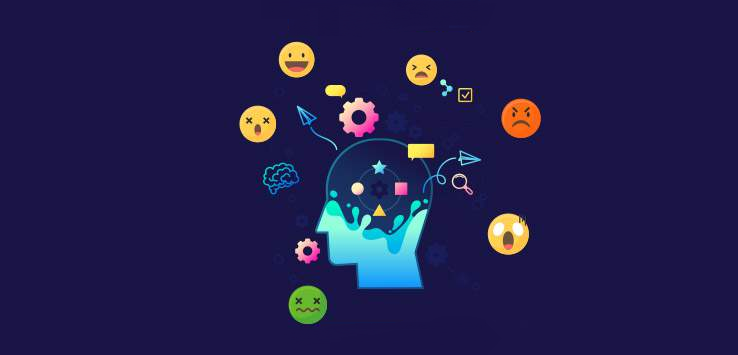

## There are a lot of tweets about Ukraine and russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. <br><br> This project tries to analyze the sentiments of people over the Ukraine and Russia war using tweets with the help of python

<tt>Link for kaggle dataset - https://www.kaggle.com/datasets/foklacu/ukraine-war-tweets-dataset-65-days

</br>

# Importing modules

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob #Processing textual data
from wordcloud import WordCloud #Textual data is highlighted using this
import re #find and replace characters in string
import plotly.express as px
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

# Uploading Dataset

In [108]:
#Reading the database
df = pd.read_csv("D:\AIF\FinalProject\Russia_invade.csv")

In [109]:
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/pat_ianni/status/150025982...,2022-03-05 23:59:50+00:00,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,1500259827154505728,"{'_type': 'snscrape.modules.twitter.User', 'us...",14,26,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia invade
1,snscrape.modules.twitter.Tweet,https://twitter.com/luxeprogressive/status/150...,2022-03-05 23:59:05+00:00,@ProfPaulPoast He doesn’t have to like it but ...,@ProfPaulPoast He doesn’t have to like it but ...,1500259636863246336,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
2,snscrape.modules.twitter.Tweet,https://twitter.com/spielblog/status/150025947...,2022-03-05 23:58:26+00:00,@SemproniusT @RichardHanania And if NATO is th...,@SemproniusT @RichardHanania And if NATO is th...,1500259474040180738,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
3,snscrape.modules.twitter.Tweet,https://twitter.com/JumboSlunce/status/1500259...,2022-03-05 23:58:20+00:00,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,1500259447742115841,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.500248e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
4,snscrape.modules.twitter.Tweet,https://twitter.com/ronanmcmanus/status/150025...,2022-03-05 23:58:17+00:00,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,1500259435142340608,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.500258e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade


# Data cleaning

### Checking for null values if any within the necessary columns

In [110]:
df.isnull().sum()

_type                    0
url                      0
date                     0
content                  0
renderedContent          0
id                       0
user                     0
replyCount               0
retweetCount             0
likeCount                0
quoteCount               0
conversationId           0
lang                     0
source                   0
sourceUrl                0
sourceLabel              0
outlinks            131504
tcooutlinks         131504
media               159199
retweetedTweet      170835
quotedTweet         158743
inReplyToTweetId     76343
inReplyToUser        76343
mentionedUsers       70288
coordinates         169073
place               169073
hashtags            151809
cashtags            170163
Searh                    0
dtype: int64

In [111]:
df.shape

(170835, 29)

In [112]:
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')

In [113]:
df.nunique()

_type                    1
url                 170835
date                163427
content             170051
renderedContent     167047
id                  170835
user                124598
replyCount             316
retweetCount           464
likeCount              980
quoteCount             175
conversationId      136718
lang                    35
source                 883
sourceUrl              763
sourceLabel            883
outlinks             28781
tcooutlinks          38473
media                11289
retweetedTweet           0
quotedTweet          10710
inReplyToTweetId     85054
inReplyToUser        55194
mentionedUsers       64950
coordinates            962
place                  952
hashtags             11167
cashtags               255
Searh                    1
dtype: int64

### Removing unnecessary columns

In [114]:
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')

In [115]:
df = df.drop(['_type', 'url', 'renderedContent', 'replyCount', 
              'conversationId', 'sourceUrl', 'source', 'sourceUrl', 'media'], axis = 1)

In [116]:
df.columns

Index(['date', 'content', 'id', 'user', 'retweetCount', 'likeCount',
       'quoteCount', 'lang', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser',
       'mentionedUsers', 'coordinates', 'place', 'hashtags', 'cashtags',
       'Searh'],
      dtype='object')

In [117]:
df = df.drop(['retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser',
       'mentionedUsers', 'hashtags', 'cashtags',
       'Searh'], axis = 1)

### Cleaning the Date column

In [118]:
#Fucntion to clean the date column
def remtime(text):
    text = text[:10]
    return text


In [119]:
df['date'] = df['date'].apply(remtime)

In [120]:
df['date']

0         2022-03-05
1         2022-03-05
2         2022-03-05
3         2022-03-05
4         2022-03-05
             ...    
170830    2021-12-31
170831    2021-12-31
170832    2021-12-31
170833    2021-12-31
170834    2021-12-31
Name: date, Length: 170835, dtype: object

# EDA

### How many tweets were made per day

In [121]:
df.date.value_counts()

2022-03-05    5000
2022-02-21    5000
2022-03-04    5000
2022-02-11    5000
2022-02-12    5000
              ... 
2022-01-05     242
2022-01-08     222
2022-01-07     204
2022-01-04     191
2022-01-01     151
Name: date, Length: 65, dtype: int64

In [122]:
#Using the groupby function to find unique dates along with the number of tweets made that day
dates = df.groupby(df.date).count()

In [123]:
dates = dates['id']

In [124]:
dates

date
2021-12-31     345
2022-01-01     151
2022-01-02     324
2022-01-03     399
2022-01-04     191
              ... 
2022-03-01    5000
2022-03-02    5000
2022-03-03    5000
2022-03-04    5000
2022-03-05    5000
Name: id, Length: 65, dtype: int64

In [125]:
#Chaing the series to a dataframe and reseting index
dates = pd.DataFrame(dates).reset_index()

In [126]:
dates

,date,id
0,2021-12-31,345
1,2022-01-01,151
2,2022-01-02,324
3,2022-01-03,399
4,2022-01-04,191
...,...,...
60,2022-03-01,5000
61,2022-03-02,5000
62,2022-03-03,5000
63,2022-03-04,5000


In [127]:
dates.columns = ['id', 'date']

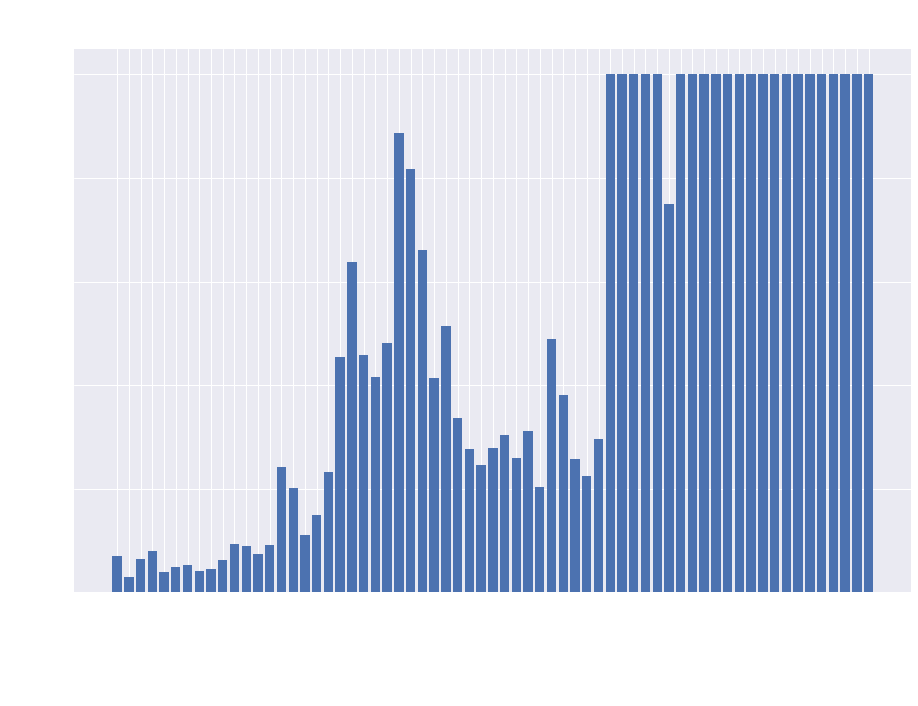

In [128]:
# For plotting the below graph
plt.figure(figsize = [15,10])
plt.bar(dates['id'], dates['date'])
plt.title('Number of tweets each day', color = 'white', size = 30, pad = 20)
plt.xlabel('Tweets', color = 'white', size = 30, labelpad = 20)
plt.ylabel('Number of Tweets', color = 'white', size = 30, labelpad = 10)
plt.xticks(rotation = 90, color = 'white')
plt.yticks(color = 'white')
plt.show()

#### Conclusion - 
i. We have data for 65 days from 31-12-2021 to 05-03-2022 <br>
ii. We can also notice a sudden spike in the number of tweets from 11th Feb' there were more than 5000 tweets been made per day and we could see the trend continue for the whole range of the date

In [129]:
beforeWar = dates[dates['id'] < '2022-02-11']

afterWar = dates[dates['id'] >= '2022-02-11']

In [130]:
beforeWar.columns

Index(['id', 'date'], dtype='object')

In [131]:
bf = beforeWar.describe().transpose()['mean']
bf[0]

1359.095238095238

In [132]:
af = afterWar.describe().transpose()['mean']
af

date    4945.782609
Name: mean, dtype: float64

In [133]:
xaxis = ['Before War Started', 'After war started']
yaxis = [bf[0], af[0]]

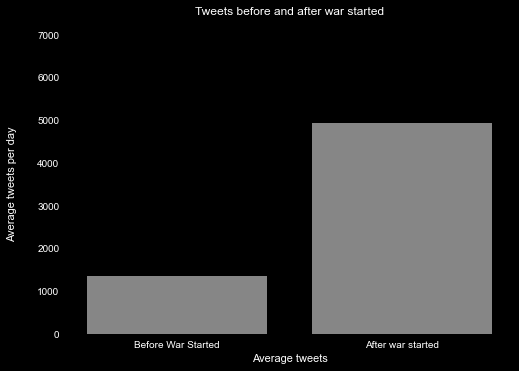

In [134]:
plt.style.use('dark_background')
plt.bar(x = xaxis, height = yaxis, color = "#868686")
plt.xlabel('Average tweets')
plt.ylabel('Average tweets per day',labelpad = 20)
plt.title('Tweets before and after war started', pad = 20)
plt.ylim(0, 7000)
plt.grid(visible = None)
plt.show()

#### From the above graph we can see there is a sudden spike in daily average tweets a week before the war started

<br>

### Which language is used the most?

In [135]:
# Getting unique values for languages along with count
# Creating a new dataframe in language
language = (df['lang'].value_counts()).reset_index()

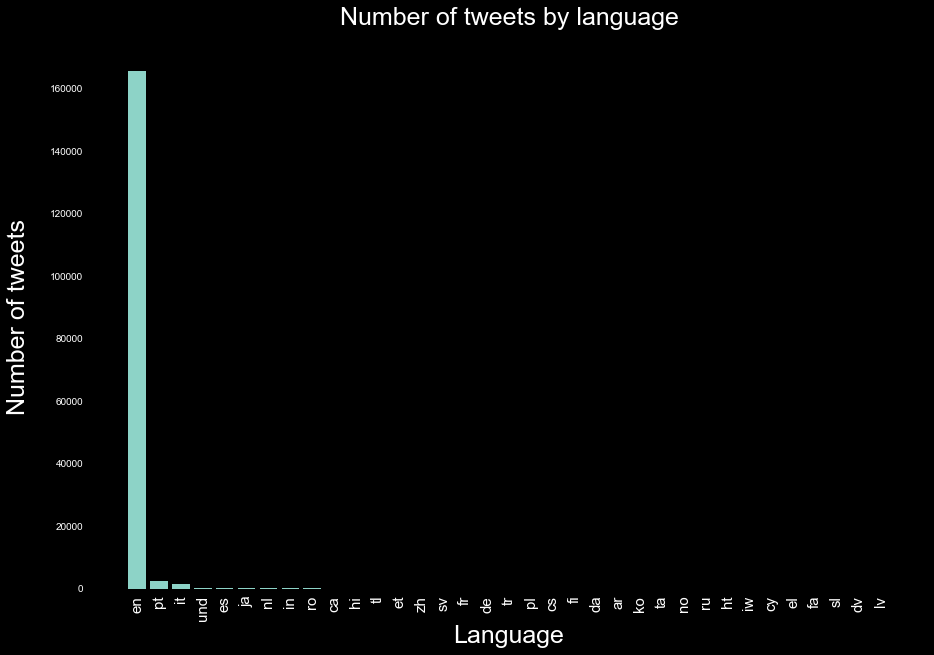

In [136]:
plt.style.use('dark_background')
plt.figure(figsize = (15,10))
plt.bar(language['index'], language['lang'])
plt.grid(visible = None)
plt.xticks(rotation = 90, size = 15)
plt.xlabel('Language', size = 25)
plt.ylabel('Number of tweets', size = 25, labelpad = 20)
plt.title('Number of tweets by language', size = 25, pad = 20)

plt.show()

#### Conclusion -  Thus it can be seen from the graph that the most commonly used language for the tweets is English

### Like & Retweet count

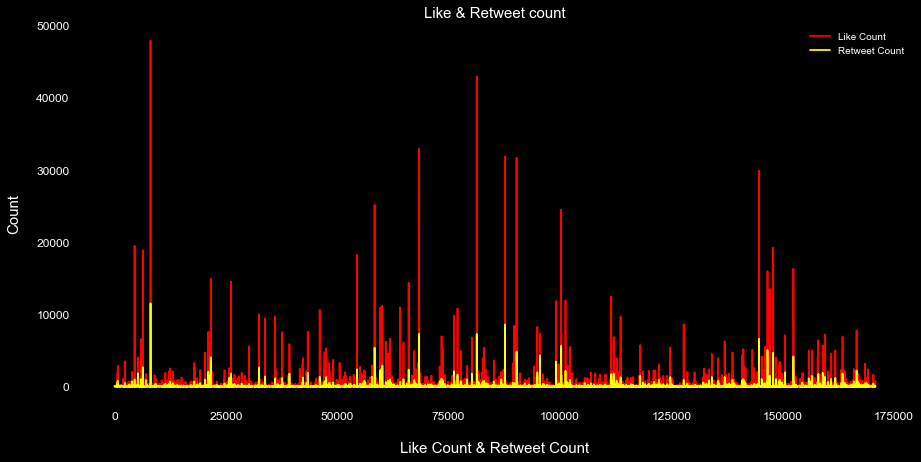

In [137]:
plt.style.use('dark_background')
plt.figure(figsize = (15,7))
plt.plot(df['likeCount'], c = 'red', label = 'Like Count')
plt.plot(df['retweetCount'], c = 'yellow', label = 'Retweet Count')
plt.xlabel('Like Count & Retweet Count', labelpad = 20, size =15)
plt.ylabel('Count', labelpad = 15, size = 15)
plt.title('Like & Retweet count', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend()
plt.grid(visible = None)
plt.show()

#### It can be seen from the above graph that there is a relation between the like and the retweet count <br>The retweet count spikes with a lower intensity with the spike in like count

### Number of tweets per user (Top 50)

In [138]:
# The user column has values stored in a dictionary format
df['user']

0         {'_type': 'snscrape.modules.twitter.User', 'us...
1         {'_type': 'snscrape.modules.twitter.User', 'us...
2         {'_type': 'snscrape.modules.twitter.User', 'us...
3         {'_type': 'snscrape.modules.twitter.User', 'us...
4         {'_type': 'snscrape.modules.twitter.User', 'us...
                                ...                        
170830    {'_type': 'snscrape.modules.twitter.User', 'us...
170831    {'_type': 'snscrape.modules.twitter.User', 'us...
170832    {'_type': 'snscrape.modules.twitter.User', 'us...
170833    {'_type': 'snscrape.modules.twitter.User', 'us...
170834    {'_type': 'snscrape.modules.twitter.User', 'us...
Name: user, Length: 170835, dtype: object

In [139]:
df['user'][0]

'{\'_type\': \'snscrape.modules.twitter.User\', \'username\': \'pat_ianni\', \'id\': 1419111323707711489, \'displayname\': \'Conspiracy_Realist84\', \'description\': "🇦🇺🇮🇹Have a bad sense of humor,I\'m a truth seeker.\\nwill not stand for government tyranny.", \'rawDescription\': "🇦🇺🇮🇹Have a bad sense of humor,I\'m a truth seeker.\\nwill not stand for government tyranny.", \'descriptionUrls\': None, \'verified\': False, \'created\': \'2021-07-25T01:45:03+00:00\', \'followersCount\': 2941, \'friendsCount\': 2018, \'statusesCount\': 4649, \'favouritesCount\': 8813, \'listedCount\': 0, \'mediaCount\': 983, \'location\': \'Melbourne, Victoria\', \'protected\': False, \'linkUrl\': None, \'linkTcourl\': None, \'profileImageUrl\': \'https://pbs.twimg.com/profile_images/1475645927691980800/HG1Kd42Z_normal.jpg\', \'profileBannerUrl\': \'https://pbs.twimg.com/profile_banners/1419111323707711489/1627177899\', \'label\': None, \'url\': \'https://twitter.com/pat_ianni\'}'

In [140]:
# Using the eval function to convert it to a dictionary
eval(df['user'][0])

{'_type': 'snscrape.modules.twitter.User',
 'username': 'pat_ianni',
 'id': 1419111323707711489,
 'displayname': 'Conspiracy_Realist84',
 'description': "🇦🇺🇮🇹Have a bad sense of humor,I'm a truth seeker.\nwill not stand for government tyranny.",
 'rawDescription': "🇦🇺🇮🇹Have a bad sense of humor,I'm a truth seeker.\nwill not stand for government tyranny.",
 'descriptionUrls': None,
 'verified': False,
 'created': '2021-07-25T01:45:03+00:00',
 'followersCount': 2941,
 'friendsCount': 2018,
 'statusesCount': 4649,
 'favouritesCount': 8813,
 'listedCount': 0,
 'mediaCount': 983,
 'location': 'Melbourne, Victoria',
 'protected': False,
 'linkUrl': None,
 'linkTcourl': None,
 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1475645927691980800/HG1Kd42Z_normal.jpg',
 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1419111323707711489/1627177899',
 'label': None,
 'url': 'https://twitter.com/pat_ianni'}

In [141]:
# Extracting the required value from the dictionary
eval(df['user'][0])['username']

'pat_ianni'

In [142]:
# Using the eval funtion on whole column
df['user'] = df['user'].apply(eval)

In [143]:
# function to extract username for each dict
def username(text):
    return text['username']

In [144]:
df['username'] = df['user'].apply(username)

In [145]:
df['username'].value_counts()

AndyVermaut        153
PoliticalGeeker    115
BistoshW            92
MarketsCafe         78
aw_journal2021      72
                  ... 
pressyprice          1
jkellymcgowan        1
Josh45939471         1
aztwizzler           1
CZCBZ                1
Name: username, Length: 114763, dtype: int64

In [146]:
df.shape

(170835, 14)

In [147]:
users = (pd.DataFrame(df['username'].value_counts().head(50))).reset_index()
users

,index,username
0,AndyVermaut,153
1,PoliticalGeeker,115
2,BistoshW,92
3,MarketsCafe,78
4,aw_journal2021,72
5,owhy3,70
6,riverotter1968,65
7,SkyNetPlatform,63
8,EuropeNews_b,63
9,DHFabian1,60


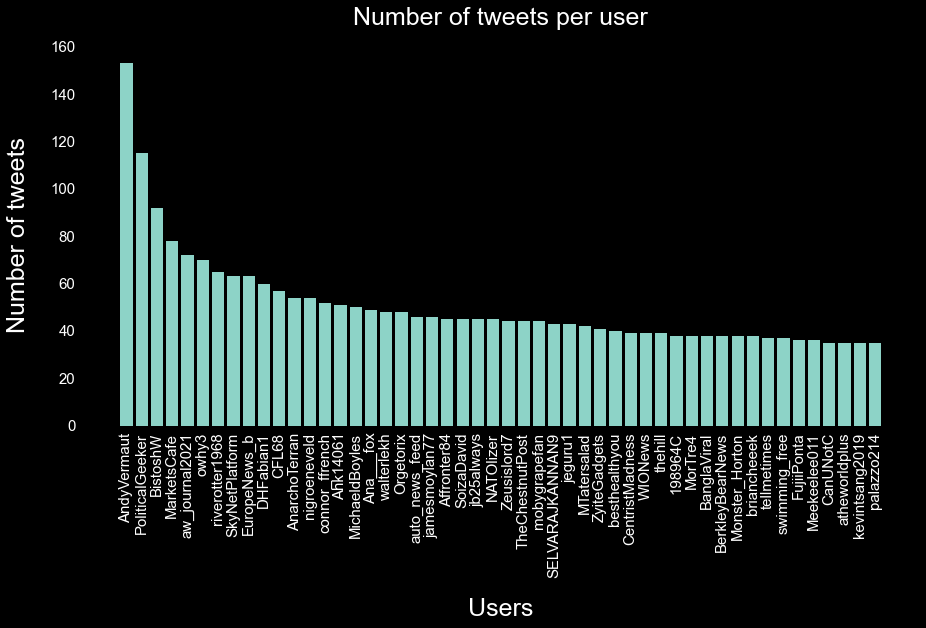

In [148]:
plt.figure(figsize = (15,7))
plt.bar(users['index'], users['username'])
plt.grid(visible = None)
plt.xlabel('Users', size = 25, labelpad = 20)
plt.ylabel('Number of tweets', size = 25, labelpad = 20)
plt.title('Number of tweets per user', size = 25, pad = 20)
plt.xticks(rotation = 90, size = 15)
plt.yticks(size = 15)
plt.show()

##### The user with the most tweets are <u>AndyVermaut</u>, <u>PoliticalGeeker</u>, <u>BistoshW</u> respectively.

<br>

### Number of tweets by country

In [149]:
df['place']

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
170830    {'_type': 'snscrape.modules.twitter.Place', 'f...
170831                                                  NaN
170832                                                  NaN
170833                                                  NaN
170834                                                  NaN
Name: place, Length: 170835, dtype: object

In [150]:
# Creating a new dataframe with tweets and location
country = df[['content', 'place']]

In [151]:
# Removing the null values
country.dropna(inplace = True)

In [152]:
country.shape

(1762, 2)

In [153]:
# Converting to dictionary
country['place'] = country['place'].apply(eval)

In [154]:
# Functions to extract required data dictionary
def city(text):
    return text['name']

def countryRe(text):
    return text['country']

def getCountryCode(text):
    return text['countryCode']


In [155]:
# Using those functions
country['City'] = country['place'].apply(city)
country['Country'] = country['place'].apply(countryRe)
country['countrycode'] = country['place'].apply(getCountryCode)

In [156]:
country

,content,place,City,Country,countrycode
16,This is how the #USA and #Britain invade a cou...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Hamburg,Germany,DE
114,@Woj_Pawelczyk Putin decided to invade Russia ...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Buckeye,United States,US
244,@arj98207 @disclosetv Why does Russia want to ...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Haxey,United Kingdom,GB
249,It was wrong for Putin to invade Ukraine out o...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Highland,United States,US
311,@jdmarrs @anders_aslund Russia had already thr...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",San Pedro,Republic of the Philippines,PH
...,...,...,...,...,...
170524,@thehill Imagine Russia posting his Army on US...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Doncaster,United Kingdom,GB
170548,Wonder if Russia will invade Ukraine Saturday...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Bath,United Kingdom,GB
170553,@DiretoFront Biden não manda mais nada nos EUA...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Natal,Brazil,BR
170788,Is Russia preparing to invade Ukraine? And oth...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Chapeltown,United Kingdom,GB


In [157]:
country['City'].value_counts()

Los Angeles    32
Florida        31
Washington     29
Ukraine        22
Manhattan      20
               ..
Broomfield      1
Panama          1
East            1
Poole           1
Natal           1
Name: City, Length: 930, dtype: int64

In [158]:
country['Country'].value_counts()

United States     818
United Kingdom    299
Canada             71
Brazil             70
India              50
                 ... 
Denmark             1
Vietnam             1
Zimbabwe            1
Paraguay            1
Azerbaijan          1
Name: Country, Length: 86, dtype: int64

In [159]:
# Removing the place column as it is not needed anymore, has dict values
country.drop(['place'], axis = 1, inplace = True)

In [160]:
# Using groupby to create a new dataframe with unique countries and corresponding values
cityGraph = country.groupby(country['Country']).count()

In [161]:
cityGraph.reset_index(inplace = True)
cityGraph

,Country,content,City,countrycode
0,Albania,1,1,1
1,Algeria,1,1,1
2,Anguilla,1,1,1
3,Argentina,2,2,2
4,Australia,31,31,31
...,...,...,...,...
81,United Kingdom,299,299,299
82,United States,818,818,818
83,Vietnam,1,1,1
84,Zambia,1,1,1


In [162]:
cityGraph['content'].value_counts()

1      26
2      15
3       9
4       6
7       5
5       3
10      2
17      2
299     1
23      1
8       1
14      1
29      1
9       1
11      1
12      1
6       1
30      1
16      1
39      1
50      1
15      1
71      1
70      1
31      1
818     1
Name: content, dtype: int64

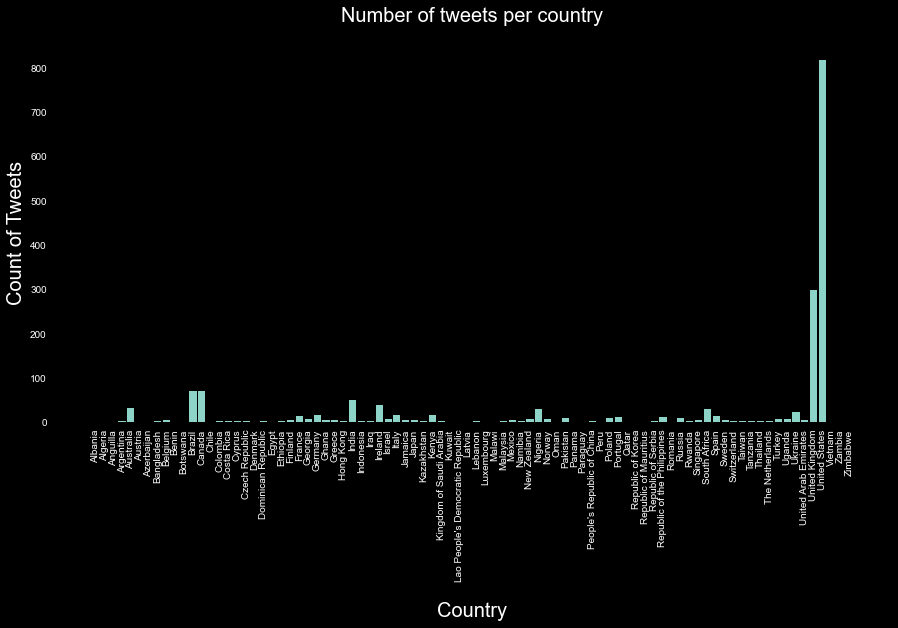

In [163]:
plt.figure(figsize = (15, 7))
plt.bar(cityGraph['Country'], cityGraph['content'])
plt.xlabel('Country', color = 'white', size = 20, labelpad = 20)
plt.ylabel('Count of Tweets', color = 'white', size = 20)
plt.title('Number of tweets per country', color = 'white', size = 20, pad = 20)
plt.xticks(rotation = 90, color = 'white', size = 10)
plt.yticks(color = 'white')
plt.grid(visible = None)
plt.show()

In [164]:
# Using this function to increase size of dots on scatter so they are visible
def increase(value):
    if value < 10:
        value = 50
        return value
    else: 
        return value

In [165]:
cityGraph['size'] = cityGraph['content'].apply(increase)


In [166]:
cityGraph

,Country,content,City,countrycode,size
0,Albania,1,1,1,50
1,Algeria,1,1,1,50
2,Anguilla,1,1,1,50
3,Argentina,2,2,2,50
4,Australia,31,31,31,31
...,...,...,...,...,...
81,United Kingdom,299,299,299,299
82,United States,818,818,818,818
83,Vietnam,1,1,1,50
84,Zambia,1,1,1,50


In [167]:
# using scatter_geo to show amount of tweets generated per country
fig = px.scatter_geo(cityGraph, locations="Country",
                     size='size',locationmode = 'country names',
                     color = 'countrycode',
                     hover_data = {'Original size' : (cityGraph['content'])}
                    )
fig.show()

##### Conclusion - From the above graph its clearly visible that the countries with the most tweets were United States and United Kingdom with 818 and 299 tweets respectively. <br>Followed by Canada, Brazil and India with 71, 70 and 50 tweets respectively

<br>

## Top 15 services used by the users for tweeting

In [168]:
#storing required values as a dataframe in a new variable
topservices = (pd.DataFrame(df['sourceLabel'].value_counts().head(15))).reset_index()

In [169]:
topservices.columns

Index(['index', 'sourceLabel'], dtype='object')

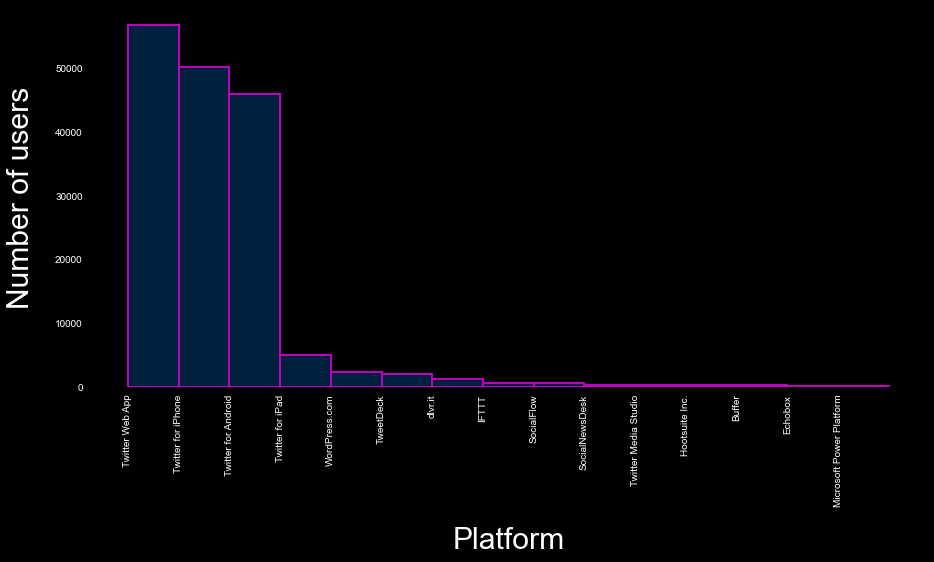

In [170]:
plt.figure(figsize = (15,7))
plt.bar('index','sourceLabel',width=1,align='edge',color='#00203FFF',edgecolor='m',linewidth=2, data=topservices)
plt.xticks(rotation = 90)
plt.xlabel('Platform', size = 30, labelpad = 20)
plt.ylabel('Number of users', size = 30, labelpad = 20)
plt.grid(visible = None)
plt.show()

##### Conclusion - The services commonly used by twitter users for tweeting are Twitter web app, <br> Twitter iPhone and Twitter android

<br>

# Sentiment Analysis

### Using regex module to clean tweets and remove (@,#) and other characters

In [171]:
# Using regex to clean the tweets column 
def clean(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # This removes @ mentions
    text = re.sub(r'#', '', text) # This function removes # symbols
    text = re.sub(r'https?:\/\/\S+', '', text) # Removes hyperlink
    text = re.sub(r'RT[\s]+', '', text) # Removes retweets
    return text

In [172]:
# Applying the function
df['content'] = df['content'].apply(clean)

In [173]:
df['content']

0         JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...
1          He doesn’t have to like it but it’s up to tho...
2           And if NATO is the aggressor then maybe Russ...
3           _   Zelensky was not put in power by a coup....
4         _4_5T_2_4_D   Or is your point that Ukraine as...
                                ...                        
170830    AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P...
170831    Prediction for this year Russia will invade Uk...
170832    Yes! For sure. Standing up for America. He wou...
170833    Russia owns Cuba and Venezuela. Putin wants to...
170834     No, Russia will go all the way. There is no p...
Name: content, Length: 170835, dtype: object

In [174]:
# Funtion to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
# Function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
# Creating two new columns ‘Subjectivity’ & ‘Polarity’
df['Subjectivity'] = df['content'].apply(getSubjectivity)
df['Polarity'] = df['content'].apply(getPolarity)

In [175]:
df

,date,content,id,user,retweetCount,likeCount,quoteCount,lang,sourceLabel,outlinks,tcooutlinks,coordinates,place,username,Subjectivity,Polarity
0,2022-03-05,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,1500259827154505728,"{'_type': 'snscrape.modules.twitter.User', 'us...",26,99,4,en,Twitter for Android,NaN,NaN,NaN,NaN,pat_ianni,0.000000,0.000000
1,2022-03-05,He doesn’t have to like it but it’s up to tho...,1500259636863246336,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,0,en,Twitter for iPhone,NaN,NaN,NaN,NaN,luxeprogressive,1.000000,0.000000
2,2022-03-05,And if NATO is the aggressor then maybe Russ...,1500259474040180738,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,Twitter Web App,NaN,NaN,NaN,NaN,spielblog,0.200000,0.300000
3,2022-03-05,_ Zelensky was not put in power by a coup....,1500259447742115841,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,Twitter for Android,NaN,NaN,NaN,NaN,JumboSlunce,0.200000,-0.300000
4,2022-03-05,_4_5T_2_4_D Or is your point that Ukraine as...,1500259435142340608,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,Twitter Web App,NaN,NaN,NaN,NaN,ronanmcmanus,0.611607,-0.013393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170830,2021-12-31,"AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P...",1476708501535690759,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,Twitter for Android,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Hansthewise,0.518182,0.323485
170831,2021-12-31,Prediction for this year Russia will invade Uk...,1476706796253425664,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,Twitter for iPhone,NaN,NaN,NaN,NaN,CollinHenriksen,0.300000,-0.150000
170832,2021-12-31,Yes! For sure. Standing up for America. He wou...,1476706129036165121,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,Twitter for Android,['https://twitter.com/SebGorka/status/14763141...,['https://t.co/FjmI9WG5ze'],NaN,NaN,DanaAnn0520,0.450556,-0.086111
170833,2021-12-31,Russia owns Cuba and Venezuela. Putin wants to...,1476706054759190530,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,en,Twitter Web App,['https://twitter.com/AlCardenasFL_DC/status/1...,['https://t.co/kRqEC1Zd75'],NaN,NaN,conchi_gonzalez,0.700000,0.266667


<br>

### Finding Sentiments

In [176]:
# Function to get sentiments
def sentiment(polarity):
    return 'Positive' if polarity > 0 else ('Negative' if polarity < 0 else 'Neutral')

In [177]:
df['Sentiment'] = df['Polarity'].apply(sentiment)

In [178]:
df['Sentiment']

0          Neutral
1          Neutral
2         Positive
3         Negative
4         Negative
            ...   
170830    Positive
170831    Negative
170832    Negative
170833    Positive
170834    Positive
Name: Sentiment, Length: 170835, dtype: object

In [179]:
df['Sentiment'].value_counts()

Positive    66205
Neutral     58685
Negative    45945
Name: Sentiment, dtype: int64

## Wordcloud

<u><b>Wordcloud</b></u> displays the words which have been used the most in a graphical manner

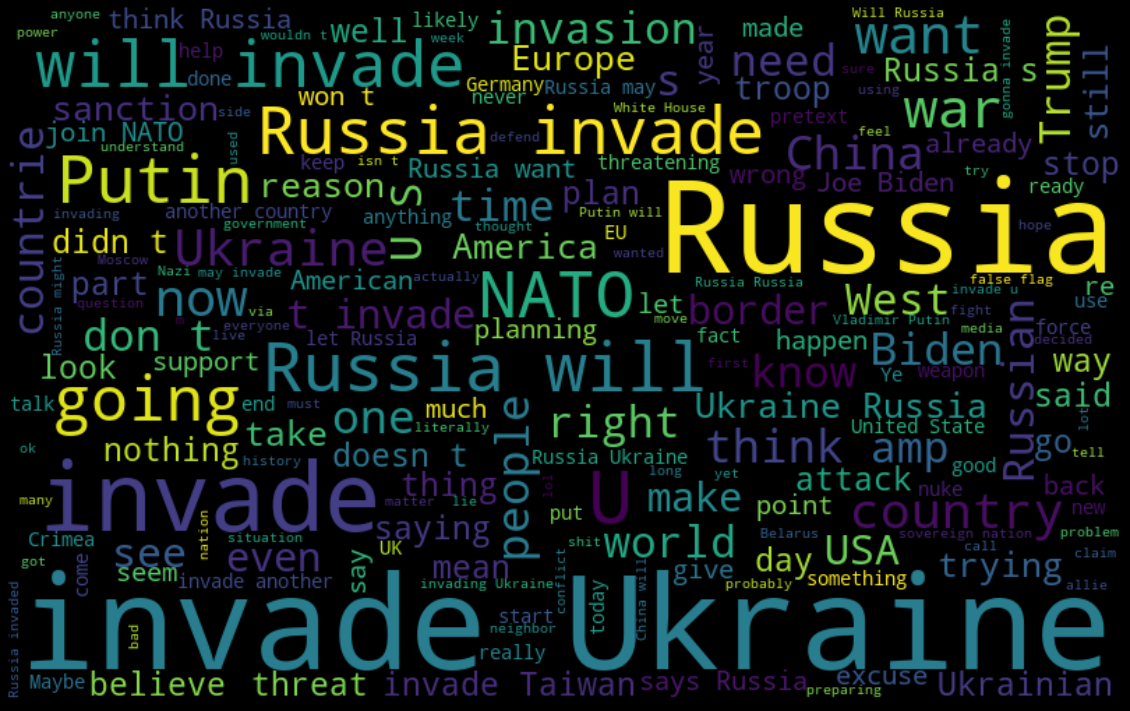

In [180]:
# wordcloud from all the tweets
plt.figure(figsize = (20, 30))
words = ' '.join(i for i in df['content'])
wordcloud = WordCloud(height = 500, width = 800, random_state=21, max_font_size=120).generate(words)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<br>

##### The user with the most tweets was <b>AndyVermaut</b> <br> So we are analyzing further to see what kind of tweets were made by him

In [181]:
df['username'].value_counts()

AndyVermaut        153
PoliticalGeeker    115
BistoshW            92
MarketsCafe         78
aw_journal2021      72
                  ... 
pressyprice          1
jkellymcgowan        1
Josh45939471         1
aztwizzler           1
CZCBZ                1
Name: username, Length: 114763, dtype: int64

In [182]:
# Storing required values as dataframe in new variable
topUser = df[df['username'] == 'AndyVermaut']

In [183]:
topUser

,date,content,id,user,retweetCount,likeCount,quoteCount,lang,sourceLabel,outlinks,tcooutlinks,coordinates,place,username,Subjectivity,Polarity,Sentiment
19971,2022-03-02,"US ramps up Ukraine warning, says Russia may i...",1498933216891129856,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,dlvr.it,['https://apnews.com/article/russia-ukraine-bo...,['https://t.co/bvIJFagyVI'],NaN,NaN,AndyVermaut,0.00000,0.00,Neutral
22624,2022-03-01,Andy Vermaut shares:‘I’m afraid Russia will in...,1498707465810046976,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,dlvr.it,['https://www.reddit.com/r/worldnews/comments/...,['https://t.co/49KboHqwr6'],NaN,NaN,AndyVermaut,0.45000,-0.30,Negative
28618,2022-02-28,Andy Vermaut shares:EU Member States Tell Thei...,1498314450855546884,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,dlvr.it,['https://www.schengenvisainfo.com/news/eu-mem...,['https://t.co/8WvcmeC6kK'],NaN,NaN,AndyVermaut,0.25000,0.25,Positive
29163,2022-02-28,Andy Vermaut shares:Maksim Chmerkovskiy Says H...,1498295238573510661,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,dlvr.it,['https://www.eonline.com/news/1321326/maksim-...,['https://t.co/Jp20g0GAmd'],NaN,NaN,AndyVermaut,0.05000,-0.05,Negative
48917,2022-02-24,"Andy Vermaut shares:Putin Says ""No Other Way"" ...",1496936300171038721,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,en,dlvr.it,['https://www.ndtv.com/world-news/putin-says-n...,['https://t.co/EodrpvBAKA'],NaN,NaN,AndyVermaut,0.28125,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167899,2022-01-10,Russia Tells U.S. Has No Plans to Invade Ukrai...,1480609669013905410,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,dlvr.it,['https://www.themoscowtimes.com/2022/01/10/ru...,['https://t.co/Y6q6dzyiDw'],NaN,NaN,AndyVermaut,0.30000,0.35,Positive
167943,2022-01-10,Russia Tells U.S. it Has 'No Intentions' to In...,1480598576333873152,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,dlvr.it,['https://www.themoscowtimes.com/2022/01/10/ru...,['https://t.co/VtL5I8i0fE'],NaN,NaN,AndyVermaut,0.00000,0.00,Neutral
169081,2022-01-06,Secretary Blinken: NATO Did Not Invade Georgia...,1479042587323289601,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,dlvr.it,['https://www.reddit.com/r/worldnews/comments/...,['https://t.co/7uJ34u6Mdo'],NaN,NaN,AndyVermaut,0.00000,0.00,Neutral
170002,2022-01-03,U.S. Chairman Of The House Intelligence Commit...,1477799386155388932,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,dlvr.it,['http://warnewsupdates.blogspot.com/2022/01/u...,['https://t.co/zq93wiPYyv'],NaN,NaN,AndyVermaut,1.00000,0.00,Neutral


In [184]:
# Removing all the unnecessary columns
topUser = topUser[['content', 'Polarity', 'Subjectivity', 'Sentiment']]
topUser

,content,Polarity,Subjectivity,Sentiment
19971,"US ramps up Ukraine warning, says Russia may i...",0.00,0.00000,Neutral
22624,Andy Vermaut shares:‘I’m afraid Russia will in...,-0.30,0.45000,Negative
28618,Andy Vermaut shares:EU Member States Tell Thei...,0.25,0.25000,Positive
29163,Andy Vermaut shares:Maksim Chmerkovskiy Says H...,-0.05,0.05000,Negative
48917,"Andy Vermaut shares:Putin Says ""No Other Way"" ...",0.00,0.28125,Neutral
...,...,...,...,...
167899,Russia Tells U.S. Has No Plans to Invade Ukrai...,0.35,0.30000,Positive
167943,Russia Tells U.S. it Has 'No Intentions' to In...,0.00,0.00000,Neutral
169081,Secretary Blinken: NATO Did Not Invade Georgia...,0.00,0.00000,Neutral
170002,U.S. Chairman Of The House Intelligence Commit...,0.00,1.00000,Neutral


In [185]:
# Grouping by sentiments to find total positive, negative and neutral sentiments
topUserSentiments = pd.DataFrame(topUser['Sentiment'].value_counts()).reset_index()

In [186]:
# Finding the percentage
topUserSentiments['Percent'] = (topUserSentiments['Sentiment'] / topUserSentiments['Sentiment'].sum()) *100

In [187]:
topUserSentiments

,index,Sentiment,Percent
0,Neutral,69,45.098039
1,Negative,48,31.372549
2,Positive,36,23.529412


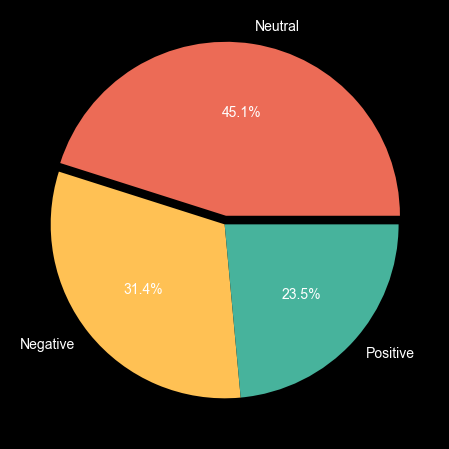

In [188]:
plt.figure(figsize = (8,8))
plt.pie(topUserSentiments['Sentiment'], labels = topUserSentiments['index'], autopct = '%1.1f%%', 
        colors = ['#EC6B56', '#FFC154', '#47B39C'], textprops={'fontsize': 14}, explode = [0.05, 0, 0])
plt.show()

#### Conclusion - The user with the most tweets had most tweets with neutral opinion about the war

<br>

# <u>Final Conclusion

In [189]:
# Grouping by sentiments to find total positive, negative and neutral sentiments
a = (df['Sentiment']).value_counts()
a

Positive    66205
Neutral     58685
Negative    45945
Name: Sentiment, dtype: int64

In [190]:
a = (pd.DataFrame(a)).reset_index()

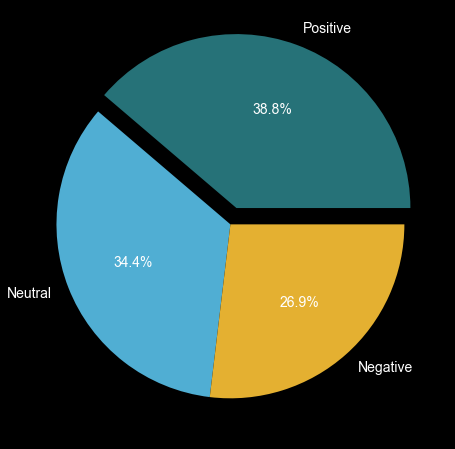

In [191]:
plt.figure(figsize = (8,8))
plt.pie(a['Sentiment'], labels = a['index'], autopct = '%1.1f%%', explode = [0.1, 0, 0],
        colors = ['#267278', '#50AED3', '#E4B031'], textprops={'fontsize': 14})
plt.show()

### - Here we can see that even though most of the opinions were positive(38.8%) there isnt much of a difference between the positive negative and the neutral opinions of the people on this matter making it safe to say that people had mixed opinions about this war

<br>

# Removing stopwords

<tt><u>Stopwords</u> - The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. <br>
 They are the words in any language which does not add much meaning to a sentence <br>
 eg:<br>
 Sentence before removing stopwords: 'This is to check is the newly created function works as expected or not haven't wasn't' <br>
 Sentence after removing stopwords:'This check newly created function works expected' <br>

<tt><u>Natural Language Toolkit</u> - The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language. It contains text processing libraries for tokenization, parsing, classification, stemming, tagging, and semantic reasoning.<br>
The goal of NLP is to program a computer to understand human speech as it is spoken.

In [192]:
import nltk
from nltk.corpus import stopwords

In [193]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nilesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [194]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [195]:
# Function to remove stopwords manually from a string
def remsw(text):
    txtlist = text.split(' ')
    newlist = []
    stoplist = []
    stop_words = set(stopwords.words('english'))
    for i in txtlist:
        if not i in stop_words:
            newlist.append(i)
    return ' '.join(newlist)

In [196]:
b = remsw('''This is to check is the newly created function works as expected or not haven't wasn't''')
b

'This check newly created function works expected'

In [197]:
# Applying the function
df2 = df['content'].apply(remsw)

In [198]:
df2

0         JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...
1          He doesn’t like it’s countries sovereign prov...
2           And NATO aggressor maybe Russia declare war ...
3           _   Zelensky put power coup. Ukraine want Ru...
4         _4_5T_2_4_D   Or point Ukraine asking NATO EU ...
                                ...                        
170830    AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P...
170831    Prediction year Russia invade Ukraine January ...
170832    Yes! For sure. Standing America. He would neve...
170833    Russia owns Cuba Venezuela. Putin wants Ukrain...
170834     No, Russia go way. There partial solution the...
Name: content, Length: 170835, dtype: object

In [199]:
df2 = pd.DataFrame(df2)

In [200]:
df2.reset_index(inplace = True)

In [201]:
df2

,index,content
0,0,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...
1,1,He doesn’t like it’s countries sovereign prov...
2,2,And NATO aggressor maybe Russia declare war ...
3,3,_ Zelensky put power coup. Ukraine want Ru...
4,4,_4_5T_2_4_D Or point Ukraine asking NATO EU ...
...,...,...
170830,170830,"AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P..."
170831,170831,Prediction year Russia invade Ukraine January ...
170832,170832,Yes! For sure. Standing America. He would neve...
170833,170833,Russia owns Cuba Venezuela. Putin wants Ukrain...


In [202]:
# Finding polarity
df2['Polarity'] = df2['content'].apply(getPolarity)

In [203]:
# Finding sentiments based of polarity
df2['sentiments'] = df2['Polarity'].apply(sentiment)
df2

,index,content,Polarity,sentiments
0,0,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,0.000000,Neutral
1,1,He doesn’t like it’s countries sovereign prov...,0.000000,Neutral
2,2,And NATO aggressor maybe Russia declare war ...,0.300000,Positive
3,3,_ Zelensky put power coup. Ukraine want Ru...,-0.300000,Negative
4,4,_4_5T_2_4_D Or point Ukraine asking NATO EU ...,-0.013393,Negative
...,...,...,...,...
170830,170830,"AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P...",0.323485,Positive
170831,170831,Prediction year Russia invade Ukraine January ...,-0.150000,Negative
170832,170832,Yes! For sure. Standing America. He would neve...,-0.086111,Negative
170833,170833,Russia owns Cuba Venezuela. Putin wants Ukrain...,0.100000,Positive


In [204]:
# finding total positive, negative and neutral tweets
sentiments = (df2['sentiments'].value_counts()).reset_index()
sentiments

,index,sentiments
0,Neutral,63497
1,Positive,62639
2,Negative,44699


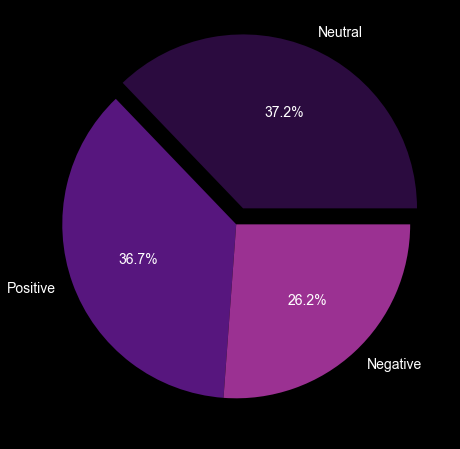

In [205]:
plt.style.use('dark_background')
plt.figure(figsize = (8,8))
plt.pie(x = sentiments['sentiments'], labels = sentiments['index'],
        colors = ['#2B0B3F', '#57167E', '#9B3192'],
        explode = [0.1, 0, 0],
        autopct = '%.1f%%', textprops = {'fontsize': 14})
plt.show()

### After removing stopwords we can observe that the size of neutral slice has increased a bit where-as the size of positive slice has decreased